In [1]:
import pandas as pd

df=pd.read_csv("example_brownian_031425.csv")

x= list(df['Frequency [Hz] - Plot 0'])
y = list(df['nm^2/Hz - Plot 0'])

temp = float(df['temp [K]'][0])
N_avgs = int(df['averages'][0])

In [2]:
from MRFM_BrownianFit.LabVIEW_int import LVprocessing

path = r".\\"
# data = LVprocessing(N_avgs, temp, x, y, name="example_20250314", path=path, fit_range_L=8600, fit_range_U=9400)
data = LVprocessing(N_avgs, temp, x, y, name="example_20250314", path=path)

c:\Users\Katri\miniconda3\envs\mrfm\lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


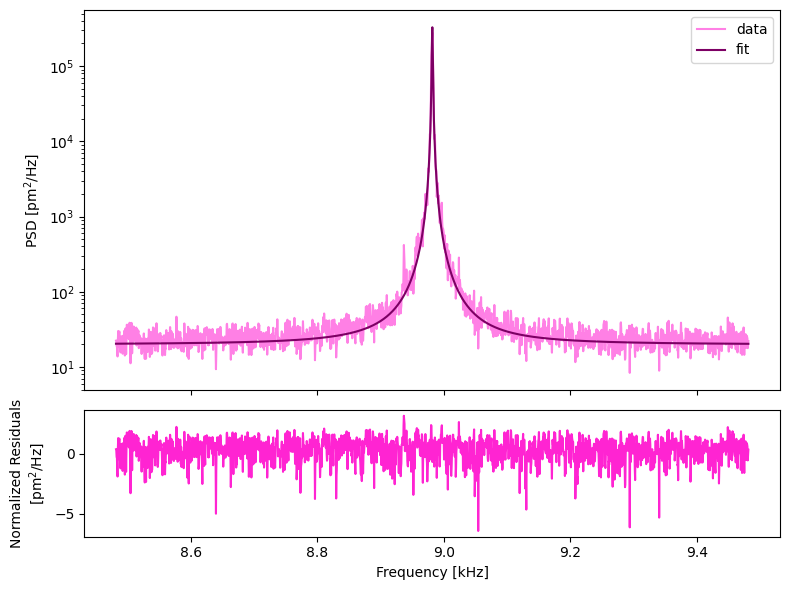

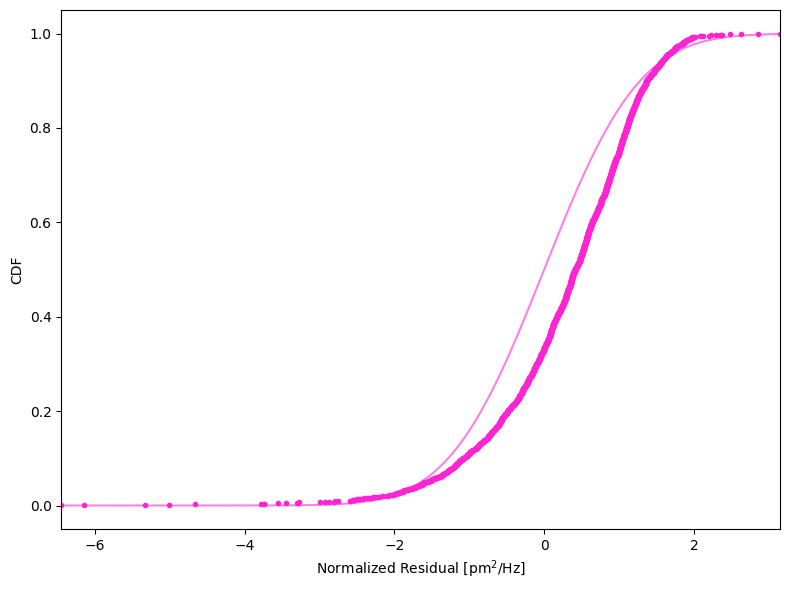

In [3]:
data.plot_report()

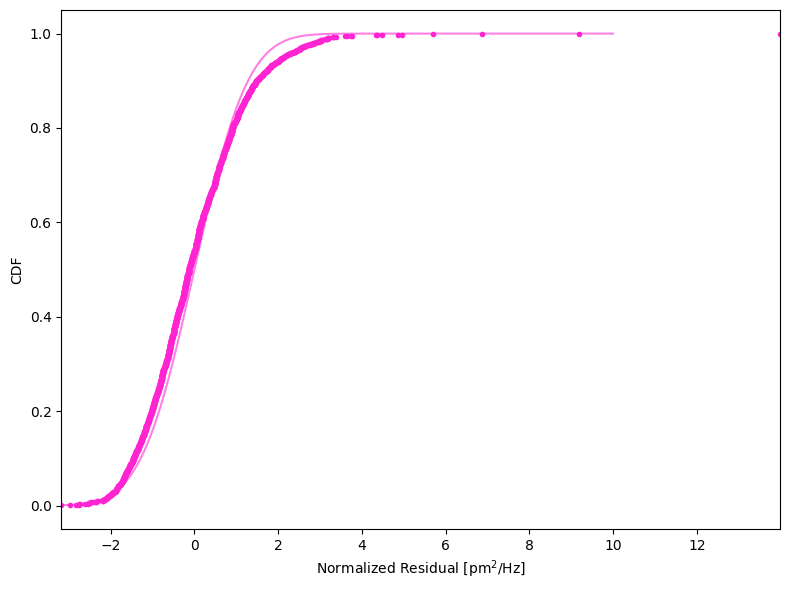

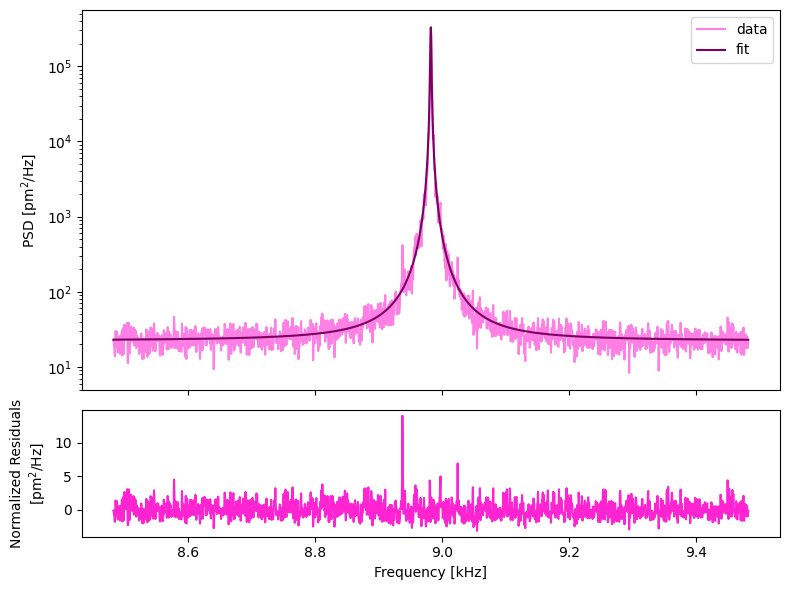

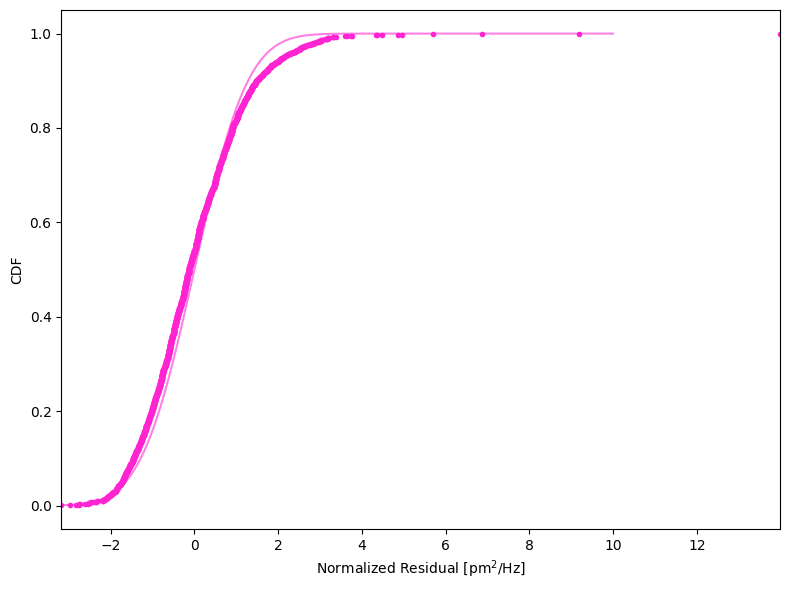

In [4]:
data.fit._two_pass_fit()
data.fit._find_params()
data.fit.plot_fit()
data.fit.residuals_CDF()

Delevloping bayesian analysis

In [5]:
sigma = data.fit.np.sqrt(1/data.fit.N_avgs)*data.fit.result['brownian'].best_fit
log_L = data.fit.np.sum(data.fit.np.log(1/data.fit.np.sqrt(2*data.fit.np.pi*sigma**2))*data.fit.np.ones_like(data.fit.x_trunc))+data.fit.np.sum(-((data.fit.result['brownian'].best_fit-data.fit.y_trunc)**2/(2*sigma**2)),1)
print(log_L)

AxisError: axis 1 is out of bounds for array of dimension 1